In [2]:
%matplotlib inline
import os
import numpy as np
import joblib

import matplotlib.pyplot as plt

# REV analysis

After running REV.py script. you will have two dictionaries in the specified output directory.
You can then use those file to plot correlation function curves which can be then interpreted and analyzed to determine REV size for a 3D volume.

In [51]:
output_dir = r"D:\Hamed\SliceGAN-V1.1\training-runs" # replace this path with your output folder
# print(output_dir)
s2_3d_dict = joblib.load(os.path.join(output_dir, 's2_3d_dict.pkl'))
f2_3d_dict = joblib.load(os.path.join(output_dir, 'f2_3d_dict.pkl'))

In [52]:
f2_3d_dict.keys(), s2_3d_dict.keys()

(dict_keys(['sub_64', 'sub_128', 'sub_256', 'sub_350', 'original']),
 dict_keys(['sub_64', 'sub_128', 'sub_256', 'sub_350', 'original']))

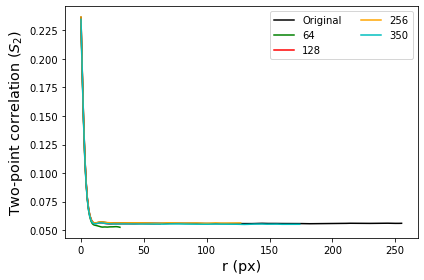

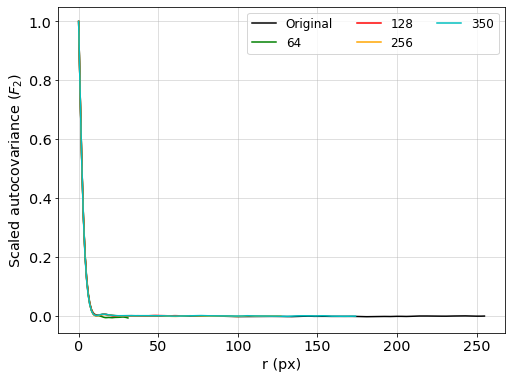

In [53]:
plt.figure()
plt.plot(s2_3d_dict['original'], 'k', label = 'Original')
plt.plot(s2_3d_dict['sub_64']['s2']['mean'], 'g', label = '64')
plt.plot(s2_3d_dict['sub_128']['s2']['mean'], 'r', label = '128')
plt.plot(s2_3d_dict['sub_256']['s2']['mean'], 'orange', label = '256')
plt.plot(s2_3d_dict['sub_350']['s2']['mean'], 'c', label = '350')

plt.xlabel('r (px)', fontsize = 'x-large')
plt.ylabel('Two-point correlation ($S_2$)', fontsize = 'x-large')

plt.legend(ncol =2)
plt.tight_layout()
plt.show()


plt.figure(figsize= (8, 6))
plt.plot(f2_3d_dict['original'], 'k', label = 'Original')
plt.plot(f2_3d_dict['sub_64']['f2']['mean'], 'g', label = '64')
plt.plot(f2_3d_dict['sub_128']['f2']['mean'], 'r', label = '128')
plt.plot(f2_3d_dict['sub_256']['f2']['mean'], 'orange', label = '256')
plt.plot(f2_3d_dict['sub_350']['f2']['mean'], 'c', label = '350')


plt.xlabel('r (px)', fontsize = 'x-large')
plt.ylabel('Scaled autocovariance ($F_2$)', fontsize = 'x-large')
plt.grid(alpha = 0.5)
plt.tick_params(labelsize = 'x-large')
plt.legend(ncol =3, fontsize = 'large')
plt.show()

# RES analysis

In [3]:
output_dir = r"D:\Hamed\SliceGAN_2Dto3D\TrainingImages" # replace this path with your output folder
# print(output_dir)
s2_dict = joblib.load(os.path.join(output_dir, 's2_dict.pkl'))
f2_dict = joblib.load(os.path.join(output_dir, 'f2_dict.pkl'))

In [7]:
s2_dict.keys(), f2_dict.keys()

(dict_keys(['sub_64', 'sub_128', 'sub_256', 'sub_512']),
 dict_keys(['sub_64', 'sub_128', 'sub_256', 'sub_512']))

In [10]:
f2_dict['sub_64']

fn               
        mean       std size
r                          
0   1.000000  0.000000   50
1   0.664644  0.193849   50
2   0.445968  0.217074   50
3   0.302165  0.202951   50
4   0.208942  0.174632   50
5   0.143420  0.146112   50
6   0.097818  0.122012   50
7   0.071092  0.098488   50
8   0.049017  0.078628   50
9   0.030720  0.061997   50
10  0.016733  0.050041   50
11  0.008412  0.042438   50
12  0.003854  0.038775   50
13  0.001087  0.036971   50
14 -0.000130  0.036827   50
15 -0.003471  0.036208   50
16 -0.006434  0.036734   50
17 -0.008750  0.035723   50
18 -0.011038  0.032980   50
19 -0.011709  0.030905   50
20 -0.010849  0.030253   50
21 -0.009701  0.033360   50
22 -0.009325  0.032749   50
23 -0.008795  0.030158   50
24 -0.007709  0.031015   50
25 -0.005965  0.032639   50
26 -0.006056  0.032922   50
27 -0.006887  0.032106   50
28 -0.004482  0.035896   50
29 -0.004195  0.037290   50
30 -0.006083  0.034499   50
31 -0.006404  0.033034   50

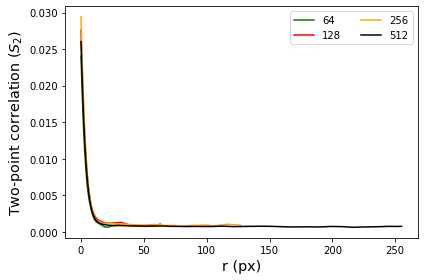

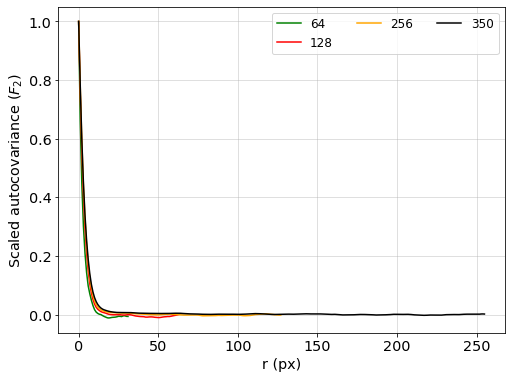

In [11]:
plt.figure()
plt.plot(s2_dict['sub_64']['s2']['mean'], 'g', label = '64')
plt.plot(s2_dict['sub_128']['s2']['mean'], 'r', label = '128')
plt.plot(s2_dict['sub_256']['s2']['mean'], 'orange', label = '256')
plt.plot(s2_dict['sub_512']['s2']['mean'], 'k', label = '512')

plt.xlabel('r (px)', fontsize = 'x-large')
plt.ylabel('Two-point correlation ($S_2$)', fontsize = 'x-large')

plt.legend(ncol =2)
plt.tight_layout()
plt.show()


plt.figure(figsize= (8, 6))
plt.plot(f2_dict['sub_64']['fn']['mean'], 'g', label = '64')
plt.plot(f2_dict['sub_128']['fn']['mean'], 'r', label = '128')
plt.plot(f2_dict['sub_256']['fn']['mean'], 'orange', label = '256')
plt.plot(f2_dict['sub_512']['fn']['mean'], 'k', label = '350')


plt.xlabel('r (px)', fontsize = 'x-large')
plt.ylabel('Scaled autocovariance ($F_2$)', fontsize = 'x-large')
plt.grid(alpha = 0.5)
plt.tick_params(labelsize = 'x-large')
plt.legend(ncol =3, fontsize = 'large')
plt.show()

In [18]:
run_path = r'D:\Hamed\SliceGAN-V1.1\training-runs\009_RES_384_ImgSize_256_BatchSize_2_D_batch_size_2_Lrg_0.0001_LrD_0.0001_Lambda_10'
mse_dict = joblib.load(os.path.join(run_path,'mse_dict.pkl'))
losses_dict = joblib.load(os.path.join(run_path, 'disc_losses.pkl'))

In [19]:
losses_dict['gen']

[104.34253692626953,
 1580.4503173828125,
 1791.279541015625,
 1775.99072265625,
 2121.6064453125,
 1783.875,
 728.0927734375,
 1151.7825927734375,
 1583.531982421875,
 1314.212890625,
 1266.718017578125,
 1235.841796875,
 984.716064453125,
 1272.545654296875,
 1474.8267822265625,
 1507.232666015625,
 1261.77685546875,
 1284.102294921875,
 1445.5316162109375]

In [12]:
float(losses_dict['gen'][0])

72.19456481933594

In [13]:
losses_dict.keys()

dict_keys(['gen', '3disc_loss_real', '3disc_loss_gen'])

In [20]:
len(losses_dict['3disc_loss_real']), len(losses_dict['3disc_loss_gen']), len(losses_dict['gen'])

(19, 19, 19)

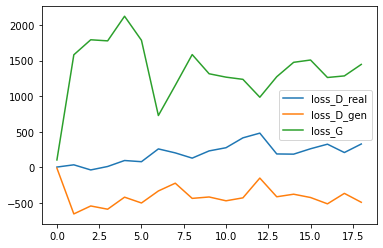

In [21]:
plt.figure()
plt.plot(losses_dict['3disc_loss_real'], label = 'loss_D_real')
plt.plot(losses_dict['3disc_loss_gen'], label = 'loss_D_gen')
plt.plot(losses_dict['gen'], label = 'loss_G')

plt.legend()
plt.show()

